<h3>Import orginial dataset</h3>

In [6]:
import pandas as pd
comments = pd.read_csv("/Users/mazichang/Desktop/Cyberviolence/Project/HateSpeechDatasetBalanced.csv")
comments.columns = ['content', 'label']

<h3>Pick out all the hateful comments</h3>

In [18]:
documents = list(comments.loc[comments.label==1]["content"])
len(documents)

364525

In [30]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

# Preprocess the documents
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = [x for x in text.split() if x not in stop]
    
    return text

# Apply preprocessing to all documents
processed_docs = []
for document in documents:
    processed_docs.append(clean_text(document))
    
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents
dictionary = Dictionary(processed_docs)
print(dictionary)

# Filter common or rare words
dictionary.filter_extremes(no_below=15, keep_n=30000)
print(dictionary)

# Create a bag-of-words representation of the documents
corpus = []
for document in processed_docs:
    bow = dictionary.doc2bow(document)
    corpus.append(bow)

from gensim.models import LdaModel

# Set the number of topics
num_topics = 10

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)

Dictionary(58665 unique tokens: ['asked', 'comment', 'con', 'denial', 'emotional']...)
Dictionary(19972 unique tokens: ['asked', 'comment', 'con', 'denial', 'emotional']...)


In [31]:
# Print the topics with their words
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
    print()

Topic 0: 0.077*"fuck" + 0.054*"fucking" + 0.034*"shit" + 0.026*"ass" + 0.024*"bitch" + 0.022*"go" + 0.019*"suck" + 0.017*"get" + 0.014*"little" + 0.013*"old"

Topic 1: 0.045*"je" + 0.043*"see" + 0.018*"za" + 0.014*"ti" + 0.014*"loud" + 0.014*"sto" + 0.011*"happens" + 0.011*"mi" + 0.011*"koi" + 0.010*"overdose"

Topic 2: 0.029*"like" + 0.016*"one" + 0.014*"slut" + 0.014*"would" + 0.012*"look" + 0.012*"idiot" + 0.011*"think" + 0.011*"really" + 0.011*"people" + 0.009*"good"

Topic 3: 0.048*"face" + 0.029*"e" + 0.023*"idea" + 0.022*"blocked" + 0.016*"drug" + 0.015*"fat" + 0.012*"bullshit" + 0.011*"joy" + 0.010*"tears" + 0.010*"nato"

Topic 4: 0.031*"wikipedia" + 0.019*"slut" + 0.018*"dont" + 0.013*"like" + 0.012*"get" + 0.012*"stop" + 0.012*"know" + 0.011*"please" + 0.011*"wiki" + 0.010*"one"

Topic 5: 0.028*"pa" + 0.020*"non" + 0.018*"bi" + 0.012*"technology" + 0.010*"bit" + 0.009*"white" + 0.009*"ne" + 0.009*"racist" + 0.008*"black" + 0.008*"nam"

Topic 6: 0.053*"shut" + 0.037*"applicabl

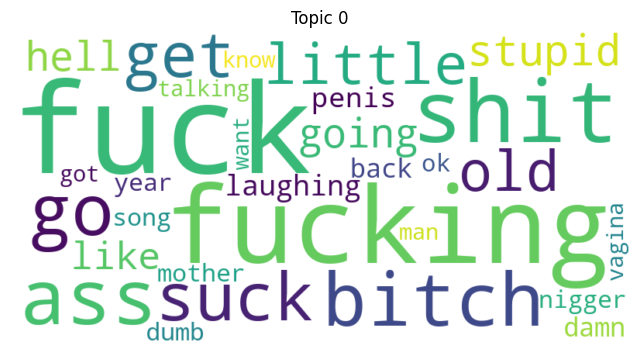

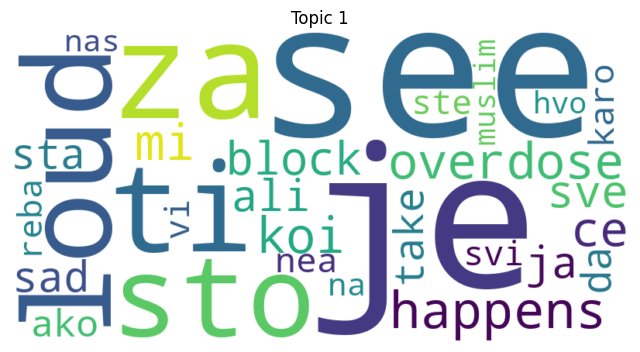

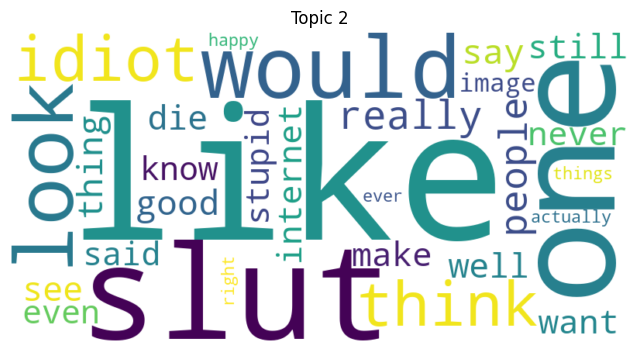

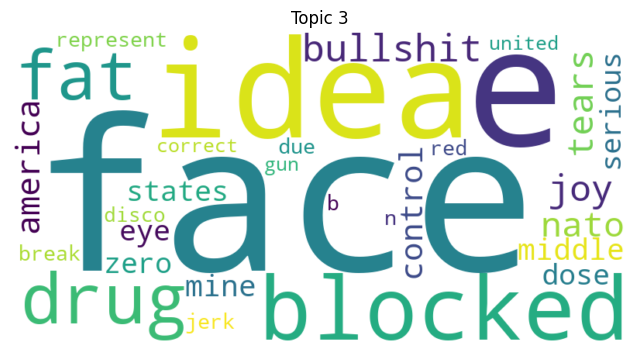

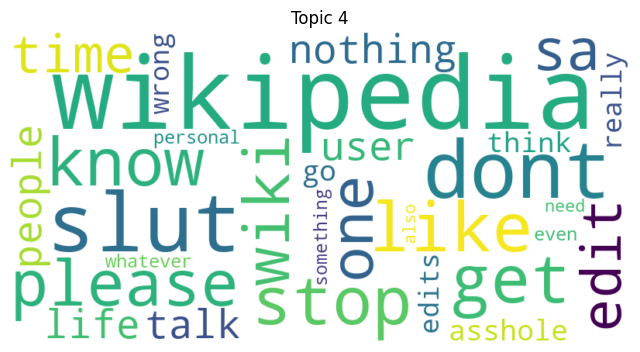

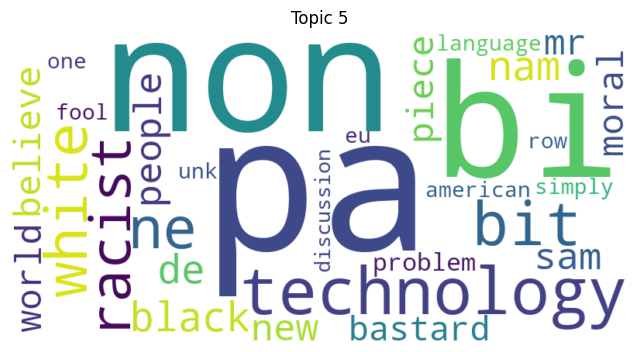

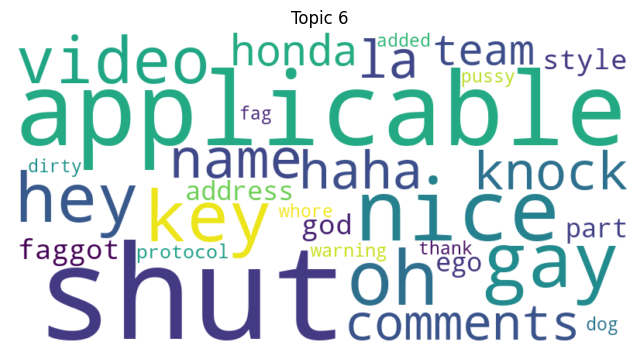

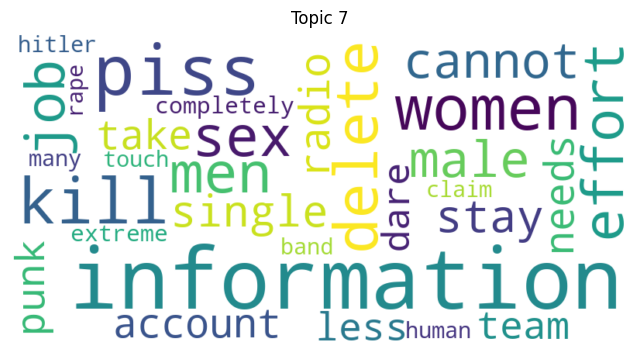

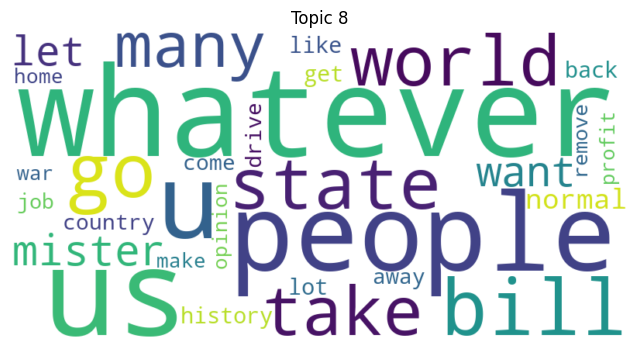

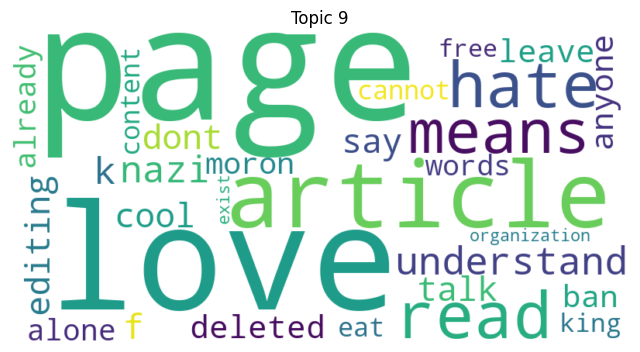

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud for a given topic
def plot_word_cloud(lda_model, topic_number):
    plt.figure(figsize=(8, 8))
    
    # Extract the words and their weights from the topic
    words = dict(lda_model.show_topic(topic_number, 30))  # Get top 30 words
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Plot the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_number}")
    plt.savefig(f"./topic_{topic_number}.png", format='png')
    plt.show()

# Plot word clouds for all topics
for topic in range(num_topics):
    plot_word_cloud(lda_model, topic)